In [1]:
# ! pip install -U git+https://github.com/huggingface/transformers.git
# ! pip install -U git+https://github.com/huggingface/accelerate.git
# !pip install xformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/huggingface/transformers.git to /tmp/pip-req-build-i3ih6iii
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/transformers.git /tmp/pip-req-build-i3ih6iii
  Resolved https://github.com/huggingface/transformers.git to commit 539e2281cd97c35ef4122757f26c88f44115fa94
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 77.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 85.4 MB/s eta 0:00:00
  Created wheel for transformers: filename=transformers-4.30.0.dev0-py3-none-any.whl size=7160079 sha256=7c4677248b18018147facd41419c11b8d97a976d8ffe57e9c8b244f346c0d94b
  Stored in directory: /tmp

In [6]:
# !pip install -U sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 24.5 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125926 sha256=bd0327dc48a0e4053b7d88f24a55ae48ffbdaaea4027004e024038d52651f466
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence-transformers


In [1]:
import numpy as np 
import pandas as pd
import os

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 10})

In [2]:
aug_df = pd.read_csv("notes.csv")
aug_df.head()

,Unnamed: 0,notes,codes,labels
0,0,"cholera due to vibrio cholerae 01, biovar eltor",A00,Cholera
1,1,"cholera, unspecified",A00,Cholera
2,2,"typhoid fever, unspecified",A010,Typhoid fever
3,3,typhoid meningitis,A010,Typhoid fever
4,4,typhoid fever with heart involvement,A010,Typhoid fever


In [3]:
np.random.seed(23)
seq = np.random.permutation(len(aug_df.labels.unique()))
chosen_cat = [aug_df.labels.unique()[s] for s in seq[:8]]
ex = ['Cholera', 'Typhoid fever', ]
chosen_cat.extend(ex)
chosen_cat

['Mechanical entropion of eyelid',
 'Postural kyphosis',
 'Postprocedural testicular hypofunction',
 'Postimmunization arthropathy, multiple sites',
 'Pathological fracture in neoplastic disease, unspecified humerus',
 'Other hypertrophic osteoarthropathy, shoulder',
 'Unspecified episcleritis',
 'Acute obstructive laryngitis [croup] and epiglottitis',
 'Cholera',
 'Typhoid fever']

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


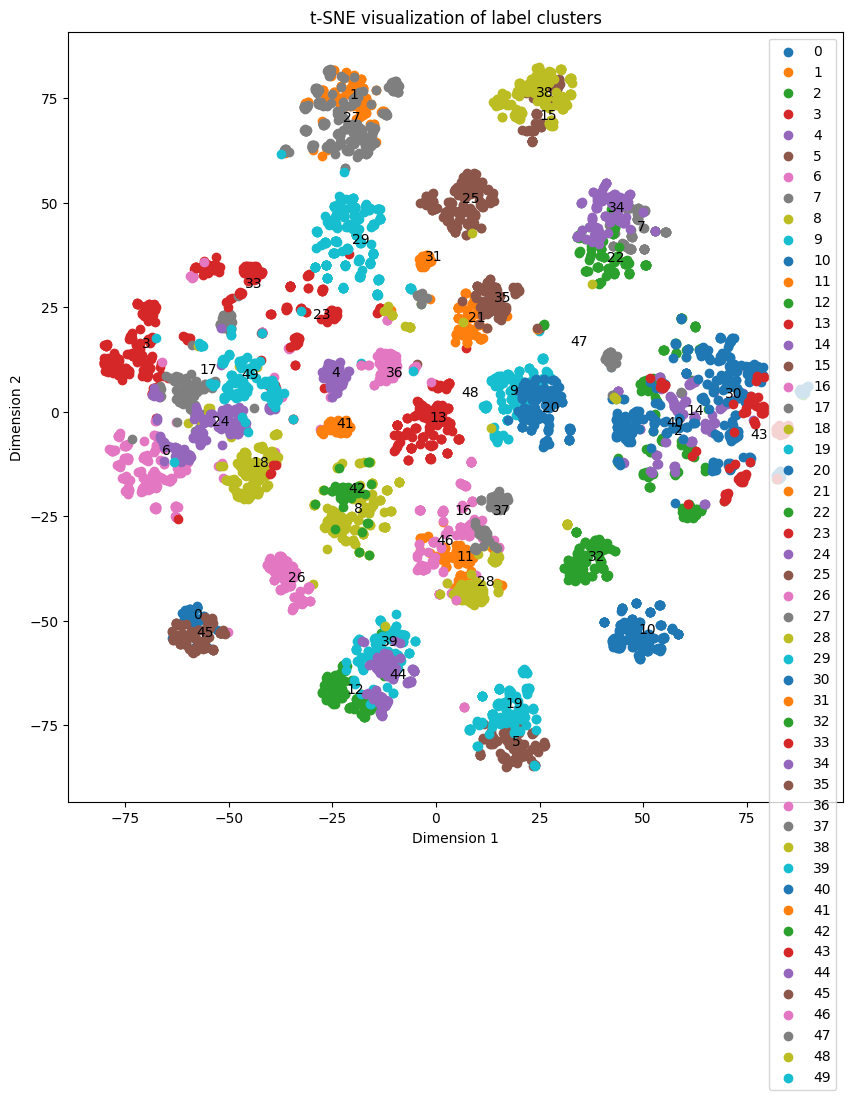

In [213]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans

labels = aug_df.codes.unique()

model = SentenceTransformer('all-MiniLM-L6-v2')
label_embeddings = model.encode(labels)

kmeans = KMeans(n_clusters=50, random_state=23).fit(label_embeddings)
label_to_cluster = {label: cluster for label, cluster in zip(labels, kmeans.labels_)}

aug_df['new_codes'] = aug_df['codes'].map(label_to_cluster)

# Use t-SNE to reduce the label embeddings to 2 dimensions
tsne_model = TSNE(n_components=2, random_state=23)
label_embeddings_2d = tsne_model.fit_transform(label_embeddings)

# Create a scatter plot of the 2D embeddings, with each cluster a different color
plt.figure(figsize=(10, 10))

for cluster in np.unique(kmeans.labels_):
    indices = np.where(kmeans.labels_ == cluster)
    cluster_points = label_embeddings_2d[indices]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=cluster)
    
    # Compute the centroid of the cluster and annotate the plot with the cluster number
    centroid = np.mean(cluster_points, axis=0)
    plt.annotate(str(cluster), (centroid[0], centroid[1]))

plt.title('t-SNE visualization of label clusters')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show()


In [214]:
print(f'Dataset Size: {len(aug_df)}')
aug_df.head()

Dataset Size: 19274


,Unnamed: 0,notes,codes,labels,new_codes
0,0,"cholera due to vibrio cholerae 01, biovar eltor",A00,Cholera,13
1,1,"cholera, unspecified",A00,Cholera,13
2,2,"typhoid fever, unspecified",A010,Typhoid fever,13
3,3,typhoid meningitis,A010,Typhoid fever,13
4,4,typhoid fever with heart involvement,A010,Typhoid fever,13


In [215]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

X = aug_df[['notes']]
y = aug_df['new_codes']


encoder = LabelEncoder()
y = encoder.fit_transform(y)

# Split the dataset into a train and temporary set
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

# Split the temporary set into validation and train set
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=23)

print(X_train.shape, X_val.shape, X_test.shape)

(11564, 1) (3855, 1) (3855, 1)


In [216]:
import torch
from torch.utils.data import Dataset, DataLoader
import torchtext

from transformers import pipeline, GPT2Tokenizer
from transformers import AutoTokenizer, AutoModelForSequenceClassification, AdamW, Trainer, TrainingArguments

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [217]:
tokenizer = GPT2Tokenizer.from_pretrained("stanford-crfm/BioMedLM")


##DistilBert
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification, DistilBertConfig

model = DistilBertForSequenceClassification.from_pretrained(
    'distilbert-base-uncased', # Use the 12-layer BERT model, with an uncased vocab.
    num_labels = len(aug_df['new_codes'].unique()))

best_model = DistilBertForSequenceClassification.from_pretrained(
    'distilbert-base-uncased', # Use the 12-layer BERT model, with an uncased vocab.
    num_labels = len(aug_df['new_codes'].unique()))


Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_projector.bias', 'vocab_layer_norm.weight', 'vocab_transform.weight', 'vocab_layer_norm.bias', 'vocab_transform.bias']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'pre_classifier.weight', 'pre_classifier.bias', 'classifier.we

In [218]:
n = aug_df.iloc[100].notes
input_ids = tokenizer.encode(n, return_tensors="pt")
tokens = tokenizer.tokenize(n)
token_ids = tokenizer.convert_tokens_to_ids(tokens)
tokens = [t.removeprefix('Ġ') for t in tokens]
print(f"tokens: {tokens}")
print(f'token ids: {token_ids}')

tokens: ['tub', 'erculosis', 'of', 'prostate']
token ids: [6007, 4862, 273, 3559]


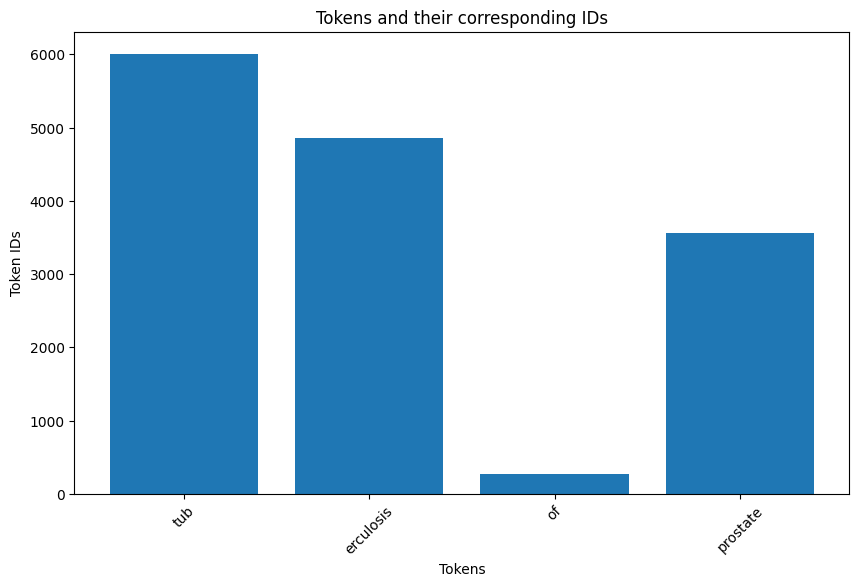

In [219]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(tokens, token_ids)
plt.xlabel('Tokens')
plt.ylabel('Token IDs')
plt.title('Tokens and their corresponding IDs')
plt.xticks(rotation=45)
plt.show()

In [220]:
print(f"Input Ids: {tokenizer(X_train.iloc[100].notes)['input_ids']}")
print(f"Attention Masks: {tokenizer(X_train.iloc[100].notes)['attention_mask']}")

Input Ids: [1751, 8292, 2719]
Attention Masks: [1, 1, 1]


In [221]:
class CustomDataset(Dataset):
    def __init__(self, X, y, tokenizer, max_length):
        self.data = []
        for i in zip(X, y):
            text, target = i[0], i[1]
            self.data.append((text, int(target)))
            self.tokenizer = tokenizer
            self.max_length = max_length
            

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        text, target = self.data[idx]
        inputs = self.tokenizer(text, return_tensors='pt')
        inputs_ids = inputs['input_ids'].squeeze(0)
        attention_masks = inputs['attention_mask'].squeeze(0)
        return inputs_ids, attention_masks, target 

In [222]:
sentences = aug_df.notes
sentences_tokenized = [tokenizer.tokenize(sentence) for sentence in sentences ]

print('Max sentence length: ', max([len(sen) for sen in sentences_tokenized]))
max_len = max([len(sen) for sen in sentences_tokenized])

Max sentence length:  36


In [223]:
train_dataset = CustomDataset(X_train, y_train, tokenizer, max_len)
val_dataset = CustomDataset(X_val, y_val, tokenizer, max_len)

batch_size = 1
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=True)


In [224]:
model = model.to(device)

# Get all of the model's parameters as a list of tuples.
params = list(model.named_parameters())

print('The BERT model has {:} different named parameters.\n'.format(len(params)))

print('==== Embedding Layer ====\n')

for p in params[0:5]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== First Transformer ====\n')

for p in params[5:21]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== Output Layer ====\n')

for p in params[-4:]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

The BERT model has 104 different named parameters.

==== Embedding Layer ====

distilbert.embeddings.word_embeddings.weight            (30522, 768)
distilbert.embeddings.position_embeddings.weight          (512, 768)
distilbert.embeddings.LayerNorm.weight                        (768,)
distilbert.embeddings.LayerNorm.bias                          (768,)
distilbert.transformer.layer.0.attention.q_lin.weight     (768, 768)

==== First Transformer ====

distilbert.transformer.layer.0.attention.q_lin.bias           (768,)
distilbert.transformer.layer.0.attention.k_lin.weight     (768, 768)
distilbert.transformer.layer.0.attention.k_lin.bias           (768,)
distilbert.transformer.layer.0.attention.v_lin.weight     (768, 768)
distilbert.transformer.layer.0.attention.v_lin.bias           (768,)
distilbert.transformer.layer.0.attention.out_lin.weight   (768, 768)
distilbert.transformer.layer.0.attention.out_lin.bias         (768,)
distilbert.transformer.layer.0.sa_layer_norm.weight           (

In [225]:
optimizer = AdamW (model.parameters(),
                  lr =4e-5, 
                  eps = 1e-8, 
                  weight_decay=0.05
                )
loss_fn = torch.nn.CrossEntropyLoss()

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [226]:
import numpy as np
from torch.nn import functional as F

def compute_acc(preds, labels):
    correct = 0
    preds_ = preds.data.max(1)[1]
    correct = preds_.eq(labels.data).cpu().sum()
    acc = float(correct) / float(len(labels.data)) * 100.0
    return acc

In [227]:
import time
import datetime

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))
    
    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))

In [228]:
def plot_loss_accuracy(train_losses, val_losses, train_accuracies, val_accuracies):
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    axs[0].plot(train_losses, label='Train Loss')
    axs[0].plot(val_losses, label='Validation Loss')
    axs[0].set_title("Losses over Epochs")
    axs[0].set_xlabel("Epoch")
    axs[0].set_ylabel("Loss")
    axs[0].legend()
    
    axs[1].plot(train_accuracies, label='Train Accuracy')
    axs[1].plot(val_accuracies, label='Validation Accuracy')
    axs[1].set_title("Accuracies over Epochs")
    axs[1].set_xlabel("Epoch")
    axs[1].set_ylabel("Accuracy")
    axs[1].legend()
    
    plt.tight_layout()

In [229]:
from transformers import get_linear_schedule_with_warmup

# Number of training epochs (authors recommend between 2 and 4)
epochs = 50
# Total number of training steps is number of batches * number of epochs.
total_steps = len(train_dataloader) * epochs
# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)

In [230]:
from IPython.display import clear_output

patience = 10
num_no_improvement = 0 

# Store the average loss after each epoch so we can plot them.
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []
show_every = 500

# Keep track of the best validation loss
best_val_loss = float('inf')


# For each epoch...
for epoch_i in range(0, epochs):
    store_train_loss = []
    store_train_acc = []
    store_val_loss = []
    store_val_acc = []
    
     # ========================================
    #               Training
    # ========================================
    
    # Perform one full pass over the training set.
    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')
    # Measure how long the training epoch takes.
    t0 = time.time()
    # Reset the total loss for this epoch.
    total_loss = 0
    
    model.train()
    
    # For each batch of training data...
    for step, batch in enumerate(train_dataloader):
        
        
        # Add batch to GPU
        batch = tuple(t.to(device) for t in batch)
        inputs_ids, attention_masks, labels = batch
        model.zero_grad()

        outputs = model(inputs_ids, attention_mask=attention_masks)
        
        loss = F.cross_entropy(outputs[0], labels)
        train_acc = compute_acc(outputs[0], labels)

        # Print the statistics
        store_train_loss.append(loss.item())
        store_train_acc.append(train_acc)
        
        # Perform a backward pass to calculate the gradients.
        loss.backward()
        
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        
        optimizer.step()

        # Update the learning rate.
        scheduler.step()
        
        # Progress update every 40 batches.
        if step % show_every == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)
            # Report progress.
            print('  Batch {} / {}.  Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))
            print('Training loss: %.3f  Training acc: %.3f'%(np.mean(store_train_loss[-show_every:]), np.mean(store_train_acc[-show_every:])) ) 
#             clear_output(wait=True)
    
        
    # compute epoch loss and accuracy 
    train_losses.append(np.mean(store_train_loss))
    train_accuracies.append(np.mean(store_train_acc))
    
    print("  Training epoch took: {:}".format(format_time(time.time() - t0)))
    
    
    
    # ========================================
    #               Validation
    # ========================================
    # After the completion of each training epoch, measure our performance on
    # our validation set.
    
    print("")
    print("Running Validation...")

    t0 = time.time()

    # Put the model in evaluation mode--the dropout layers behave differently
    # during evaluation.
    model.eval()
    
    # Evaluate data for one epoch
    for batch in val_dataloader:
        
        # Add batch to GPU
        batch = tuple(t.to(device) for t in batch)
        
        # Unpack the inputs from our dataloader
        val_inputs_ids, val_attention_masks, val_labels = batch
        
        # Telling the model not to compute or store gradients, saving memory and
        # speeding up validation
        with torch.no_grad():  
            val_outputs = model(val_inputs_ids,  
                            attention_mask=val_attention_masks)
            
        # Get the "logits" output by the model. The "logits" are the output
        # values prior to applying an activation function like the softmax.
        val_logits = val_outputs[0]
        
        val_loss = F.cross_entropy(val_logits, val_labels)
        
        # Calculate the accuracy for this batch of test sentences.
        val_acc = compute_acc(val_logits, val_labels)
        
        store_val_loss.append(val_loss.item())
        store_val_acc.append(val_acc)
        
    
    # compute epoch loss and accuracy 
    mean_val_loss = np.mean(store_val_loss)
    val_losses.append(mean_val_loss)
    val_accuracies.append(np.mean(store_val_acc))
        
    # Report the final accuracy for this validation run.
    # Print loss and acc at the end of the epoch
    print("Epoch {}: Train Loss: {:.4f}, Validation Loss: {:.4f}, Train Accuracy: {:.2f}%, Validation Accuracy: {:.2f}%".format
    (epoch_i, train_losses[-1], val_losses[-1], train_accuracies[-1], val_accuracies[-1]))
    


    #Check if validation loss has improved
    if np.mean(mean_val_loss < best_val_loss):
        best_val_loss = mean_val_loss
        # Get the current state of the model
        model_state_dict = model.state_dict()
        best_model.load_state_dict(model_state_dict)
        num_no_improvement = 0 
    else:
        num_no_improvement+=1 
    if num_no_improvement == patience: 
        break

print("")
print("Training complete!")


======== Epoch 1 / 50 ========
Training...
  Training epoch took: 0:00:00

Running Validation...
Epoch 0: Train Loss: 4.0180, Validation Loss: 3.7786, Train Accuracy: 0.00%, Validation Accuracy: 0.00%

======== Epoch 2 / 50 ========
Training...
  Training epoch took: 0:00:00

Running Validation...
Epoch 1: Train Loss: 3.7946, Validation Loss: 3.4773, Train Accuracy: 0.00%, Validation Accuracy: 100.00%

======== Epoch 3 / 50 ========
Training...
  Training epoch took: 0:00:00

Running Validation...
Epoch 2: Train Loss: 3.7333, Validation Loss: 3.2552, Train Accuracy: 0.00%, Validation Accuracy: 100.00%

======== Epoch 4 / 50 ========
Training...
  Training epoch took: 0:00:00

Running Validation...
Epoch 3: Train Loss: 3.4457, Validation Loss: 3.1466, Train Accuracy: 100.00%, Validation Accuracy: 100.00%

======== Epoch 5 / 50 ========
Training...
  Training epoch took: 0:00:00

Running Validation...
Epoch 4: Train Loss: 3.1416, Validation Loss: 2.9618, Train Accuracy: 100.00%, Validat

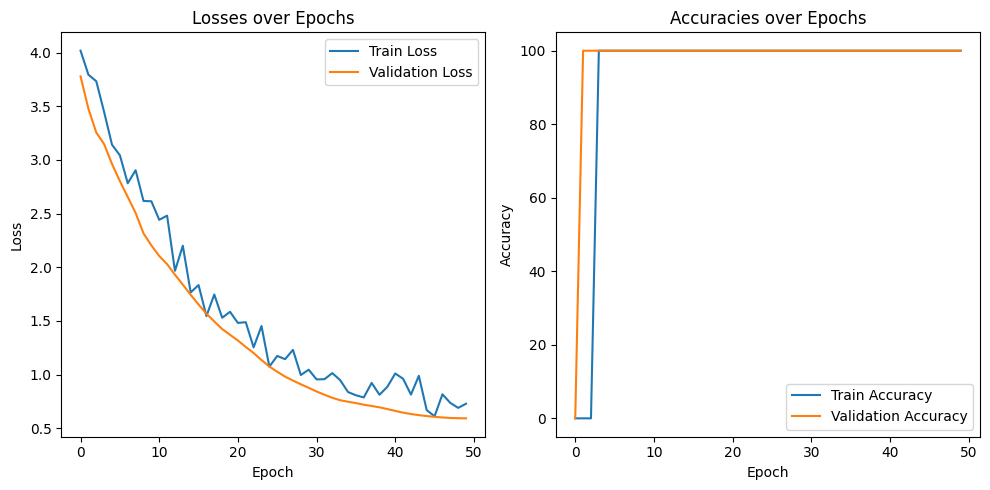

In [231]:
plot_loss_accuracy(train_losses, val_losses, train_accuracies, val_accuracies)

In [232]:
import numpy as np


model.eval()
model.eval()
with torch.no_grad():
    # Visualize the attention weights for a sample input
    text = X_test.iloc[0].notes
    inputs = tokenizer(text, return_tensors='pt')
    outputs = model(**inputs.to(device), output_attentions=True)
    predictions = torch.max(outputs[0], dim=1)[1]
    
print(predictions)

tensor([14], device='cuda:0')


Text: palindromic rheumatism, multiple sites


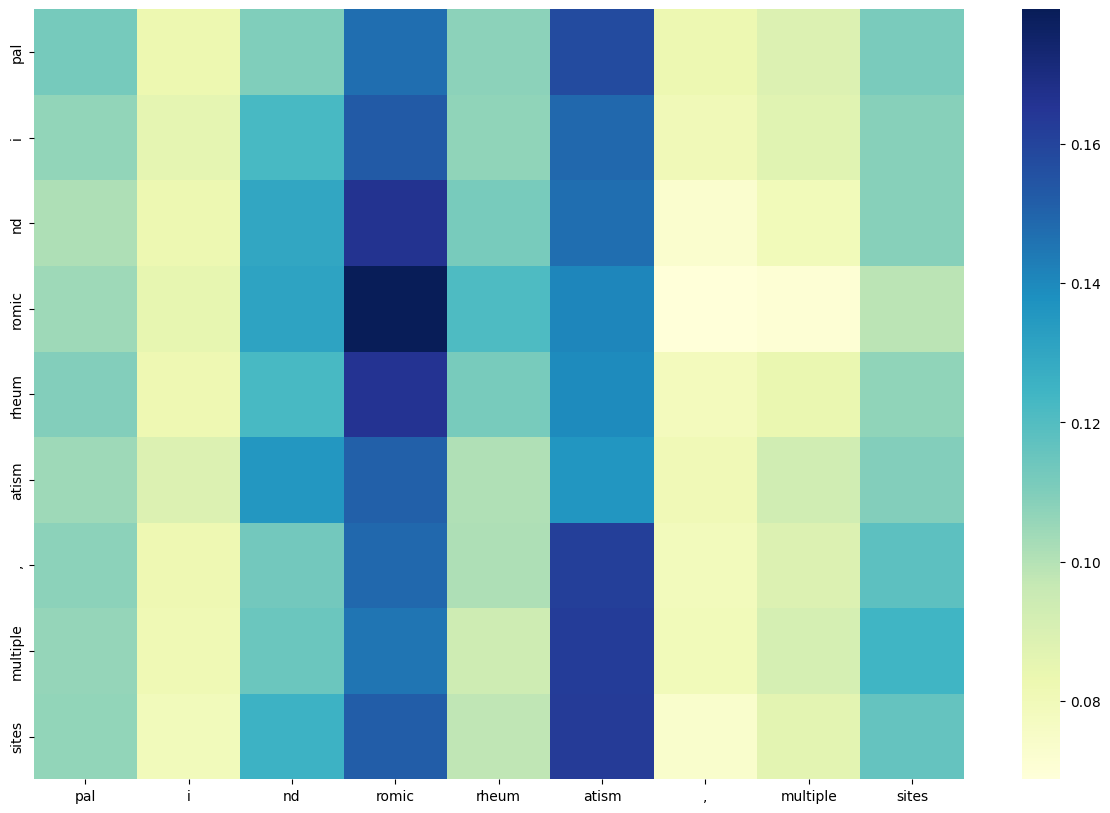

In [234]:
import seaborn as sns
import matplotlib.pyplot as plt

# Evaluate the model on the testing set
import numpy as np

model.eval()
model.eval()
with torch.no_grad():
    # Visualize the attention weights for a sample input
    text = X_test.iloc[23].notes
    print(f"Text: {text}")
    inputs = tokenizer(text, return_tensors='pt')
    outputs = model(**inputs.to(device), output_attentions=True)
    attention_weights = outputs.attentions[-1][0][0]
    attention_weights = attention_weights.cpu()
    plt.figure(figsize=(15, 10))
    tokens = [t.removeprefix('Ġ') for t in tokenizer.tokenize(text)]
    sns.heatmap(attention_weights, cmap="YlGnBu", xticklabels=tokens, yticklabels=tokens, annot=False)
    plt.show()